# Исследование продаж компьютерных игр .
   

   интернет магазин "Стримчик"                                                                           2016 год

## Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')

display(data.head(7))
data.shape

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


(16715, 11)

In [2]:
print('Общая информация о  таблице')
data.info()

Общая информация о  таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных.


### Приведем названия столбцов к нижнему регистру.

In [3]:
data.columns = map(str.lower, data.columns)
display(data.head(3))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### Преобразуем типы данных.

In [4]:
#Приведем тип данных года выпуска к int, поскольку ни времени, ни даты не содержится в данных
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Выведем количество пропущенных значений для каждого столбца. :
(всего строк 16715)

In [6]:
display(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Отсутствует большое количество данных рейтинга,оценок критиков и пользователей ,40-50%% данных. Не будем удалять столь большое количество строк из датафрейма. 
Отсутствующие года выпуска также оставим как есть.

### Посмотрим на наличие дупликатов


In [7]:
#посмотрим наличие явных дупликатов
data.duplicated().sum() 

0

Явных дупликатов нет.

In [8]:
display(data['name'].head(100).sort_values().unique())
len(data['name'].unique())

array(['Animal Crossing: New Leaf', 'Animal Crossing: Wild World',
       'Brain Age 2: More Training in Minutes a Day',
       'Brain Age: Train Your Brain in Minutes a Day',
       'Call of Duty 4: Modern Warfare', 'Call of Duty: Advanced Warfare',
       'Call of Duty: Black Ops', 'Call of Duty: Black Ops 3',
       'Call of Duty: Black Ops II', 'Call of Duty: Ghosts',
       'Call of Duty: Modern Warfare 2', 'Call of Duty: Modern Warfare 3',
       'Crash Bandicoot 2: Cortex Strikes Back', 'Donkey Kong Country',
       'Duck Hunt', 'FIFA 16', 'FIFA 17', 'FIFA Soccer 13',
       'Final Fantasy VII', 'Final Fantasy VIII', 'Final Fantasy X',
       'GoldenEye 007', 'Gran Turismo', 'Gran Turismo 2',
       'Gran Turismo 3: A-Spec', 'Gran Turismo 4', 'Gran Turismo 5',
       'Grand Theft Auto III', 'Grand Theft Auto IV',
       'Grand Theft Auto V', 'Grand Theft Auto: Liberty City Stories',
       'Grand Theft Auto: San Andreas', 'Grand Theft Auto: Vice City',
       'Halo 2', 'Halo 3',

11560

In [9]:
#приведем названия игр к нижнему регистру и посмотрим уникальные названия
data['name'] = data['name'].str.lower()

In [10]:
display(data['name'].sort_values().unique())
len(data['name'].unique())

array([' beyblade burst', ' fire emblem fates', " frozen: olaf's quest",
       ..., 'zyuden sentai kyoryuger: game de gaburincho!!',
       '¡shin chan flipa en colores!', nan], dtype=object)

11560

Неявных дупликатов написанных в разных регистрах нет. 


In [11]:
#выведем уникальные значения жанров
display(data['genre'].sort_values().unique())
len(data['genre'].unique())

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

13

Дубликатов среди жанров нет


In [12]:
display(data['user_score'].sort_values().unique())
len(data['user_score'].unique())

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

97

Абревиатура tbd означает: to be determined, т.е. находится в состоянии определения. 


In [13]:
#заменим tbd на NaN
data['user_score'] = data['user_score'].replace('tbd', 'NaN')
#приведем тип данных user_score к float64
data['user_score'] = data['user_score'].astype('float')

In [14]:
#выведем уникальные названия платформ 
display(data['platform'].sort_values().unique())
len(data['platform'].unique())

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

31

Магазин продает игры на 31 платформе. Неявных дупликатов в названии платформ нет. 

### Посчитаем суммарные продажи по всем регионам.

In [15]:
#создадим столбец total_sales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Еще раз выведем информацию по датафрейму.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ.

### Выпуск игр по годам.


<AxesSubplot:>

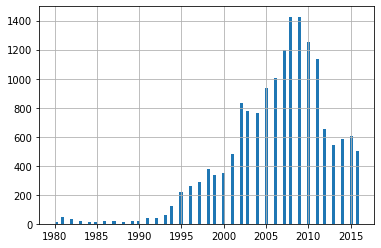

In [32]:
#построим гистограмму выпуска игр по годам
data['year_of_release'].hist(bins=100)

<AxesSubplot:xlabel='year_of_release'>

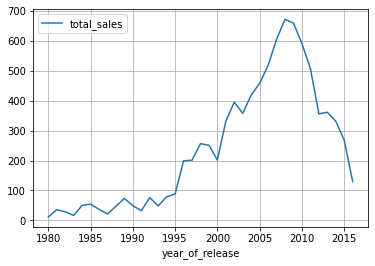

In [41]:
#построим график продажи копий игр
data_years = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_years.plot(grid=True)

Максимальное количество продаваемых игр в мире было в 2008 и 2009 годах чуть более 1400 игр в год, более 650 млн. копий.
С 1980 по по 1994 игр продавалось немного, менее 200 в год. С 1992 по 2008 происходил рост количества продаваемых игр , с 2009 по 2015 происходит падение количества продаваемых игр, с 1400 до 500 штук , 250 млн. копий. 


### Продажи игр по платформам. 

In [28]:
#создадим таблицу, срупироанную по платформам, посчитаем продажи и количество реализуемых игр 
data_platform = data.pivot_table(index='platform', values='total_sales', aggfunc=['sum','count'])
data_platform

,sum,count
,total_sales,total_sales
platform,,
2600,96.98,133
3DO,0.10,3
3DS,259.00,520
DC,15.95,52
DS,806.12,2151
GB,255.46,98
GBA,317.85,822
GC,198.93,556


In [29]:
#переименуем столбцы
data_platform.columns = ['total_sales', 'count']
#упорядочим по обьему продаж
data_platform.sort_values(by='total_sales',ascending=False ).head(30)

,total_sales,count
platform,,
PS2,1255.77,2161
X360,971.42,1262
PS3,939.65,1331
Wii,907.51,1320
DS,806.12,2151
PS,730.86,1197
GBA,317.85,822
PS4,314.14,392
PSP,294.05,1209


    На саммом верху списка платформа PS2, общие продажи 1256 млн. копий , 2161 игр. 
    Первые 6 платформ являются явными лидерами, их обьем продаж от 730 млн. копий. Все нижестоящие платформы продают вдвое, втрое и более раз меньше чем лидеры. Интересна платформа DS по выручке она на 5 месте 806 млн. копий, а по количеству игр на втором, не сильно отличаясь от лидера, 2151 игра.
    Вторая группа платформ с 7 по по 18 места с обьемом продаж от 318 млн. копий ( PS4)  до 160 млн. копий (XOne). 
  

### Изучим продажи платформ по годам. 

<AxesSubplot:>

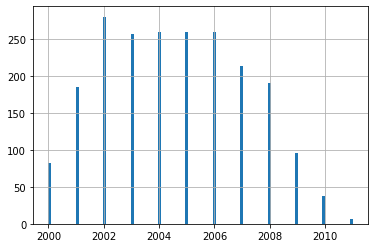

In [43]:
#построим гистограмму для платформы PS2
data.loc[data['platform'] == 'PS2', 'year_of_release'].hist(bins=100)

<AxesSubplot:>

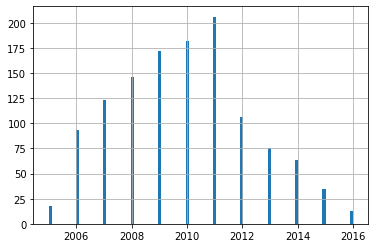

In [44]:
#построим гистограмму для платформы X360
data.loc[data['platform'] == 'X360', 'year_of_release'].hist(bins=100)

<AxesSubplot:>

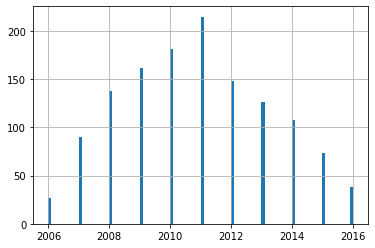

In [45]:
#построим гистограмму для платформы PS3
data.loc[data['platform'] == 'PS3', 'year_of_release'].hist(bins=100)

<AxesSubplot:>

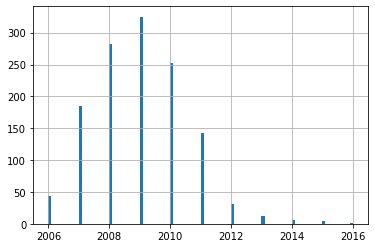

In [46]:
#построим гистограмму для платформы Wii
data.loc[data['platform'] == 'Wii', 'year_of_release'].hist(bins=100)

<AxesSubplot:>

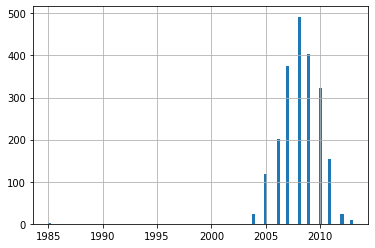

In [47]:
#построим гистограмму для платформы DS
data.loc[data['platform'] == 'DS', 'year_of_release'].hist(bins=100)

<AxesSubplot:>

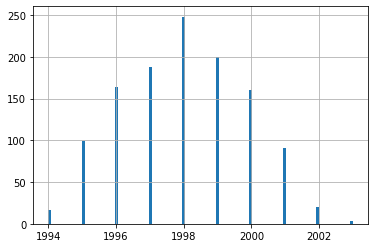

In [48]:
#построим гистограмму для платформы PS
data.loc[data['platform'] == 'PS', 'year_of_release'].hist(bins=100)

<AxesSubplot:>

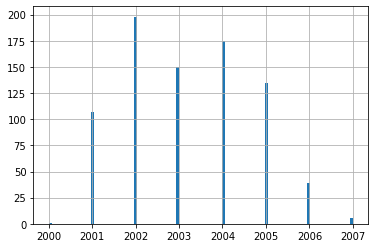

In [49]:
#построим гистограмму для платформы GBA
data.loc[data['platform'] == 'GBA', 'year_of_release'].hist(bins=100)

    Средний срок жизни платформы около 11 лет +/- 2 года. Самые мощные платформы PS2 и X360 прожили 12 лет, PS3 -11 ; WII, DS, PS-9 лет. 
    Обычно пика производительности платформа достигает в середине срока своей жизни, т.е. через 5-6 лет после начала своей деятельности.
    Актуальный период должен быть меньше 11 лет, поскольку изучать данные "умерших" платформ для задач планирования продаж на 2017 год не имеет смысла. Актуальный период установим в 4 года, чтобы изучать лидеров последних лет, и исключить пяти, шестилетние пики лидеров прошлых лет. Будем анализировать данные с 2012 года включительно. 

### Изучим продажи платформ за актуальный период.

In [50]:
#обрежем данные по актуальному периоду с 2012 года 
data_actual = data.loc[data['year_of_release'] >= 2012]
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


В актуальный период попала примерно пятая часть данных , 2886 строки. 

#### Проанализируем продажи платформ за актуальный период.

In [51]:
#создадим таблицу, сгрупированную по платформам, посчитаем продажи и количество реализуемых игр 
data_actual_pl=data_actual.pivot_table(index='platform', values='total_sales', aggfunc=['sum','count'])
#переименуем столбцы и упорядочим по продажам
data_actual_pl.columns = ['total_sales', 'count']
data_actual_pl.sort_values(by='total_sales',ascending=False ).head(30)

,total_sales,count
platform,,
PS4,314.14,392
PS3,288.79,493
X360,236.54,292
3DS,194.61,396
XOne,159.32,247
WiiU,82.19,147
PC,62.65,250
PSV,49.18,411
Wii,35.37,54


Построим гистограммы по годам для лидеров продаж. 


<AxesSubplot:>

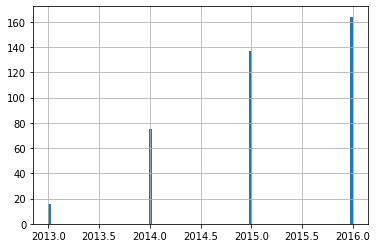

In [52]:
#построим гистограмму для платформы PS4
data_actual.loc[data_actual['platform'] == 'PS4', 'year_of_release'].hist(bins=100)

Продажи PS4  растут. Максимум в 2016 году. Перспективная платформа.

<AxesSubplot:>

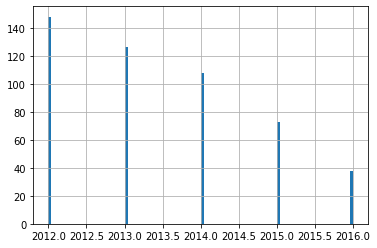

In [53]:
#построим гистограмму для платформы PS3
data_actual.loc[data_actual['platform'] == 'PS3', 'year_of_release'].hist(bins=100)

Продажи падают, пик был в 2012 году. 

<AxesSubplot:>

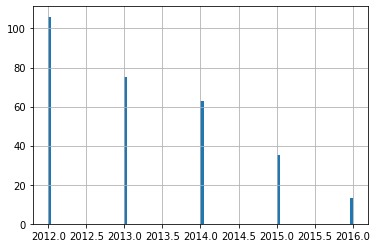

In [54]:
#построим гистограмму для платформы X360
data_actual.loc[data_actual['platform'] == 'X360', 'year_of_release'].hist(bins=100)

Продажи X360 падают, пик был в 2011 году. 

<AxesSubplot:>

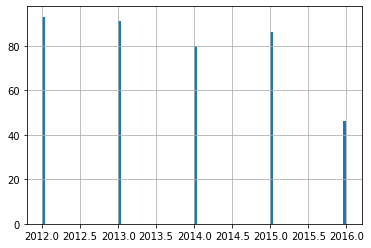

In [55]:
#построим гистограмму для платформы 3DS
data_actual.loc[data_actual['platform'] == '3DS', 'year_of_release'].hist(bins=100)

Продажи 3DS падают. 

<AxesSubplot:>

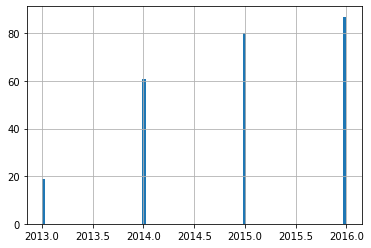

In [56]:
#построим гистограмму для платформы XOne
data_actual.loc[data_actual['platform'] == 'XOne', 'year_of_release'].hist(bins=100)

Продажи XOne растут , максимум в 2016 году. Перспективная платформа.

<AxesSubplot:>

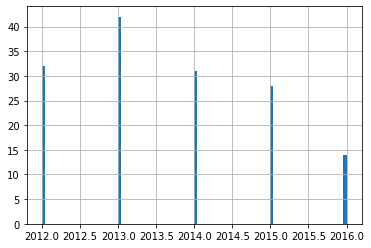

In [57]:
#построим гистограмму для платформы WiiU
data_actual.loc[data_actual['platform'] == 'WiiU', 'year_of_release'].hist(bins=100)

Продажи WiiU падают, пик был в 2013 году.

<AxesSubplot:>

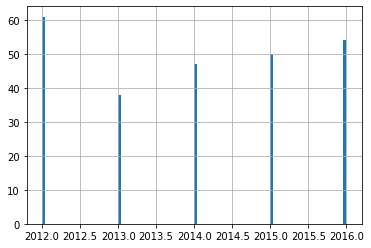

In [58]:
#построим гистограмму для платформы PC
data_actual.loc[data_actual['platform'] == 'PC', 'year_of_release'].hist(bins=100)

Продажи PC растут за последние 4 года, но в предыдущее период было падение. Расширим диапазон рассмотрения. 

<AxesSubplot:>

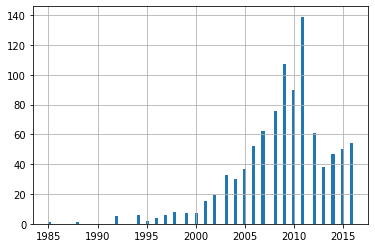

In [59]:
#построим гистограмму для платформы PC
data.loc[data['platform'] == 'PC', 'year_of_release'].hist(bins=100)

Интересная платформа , ее жизнь более 20 лет. Пик был в 2011 году, падение в 2013 , последнии три года рост. Возможно им известен закон второй молодости? Стоит рассмотреть сотрудничество с этой платформой. 

<AxesSubplot:>

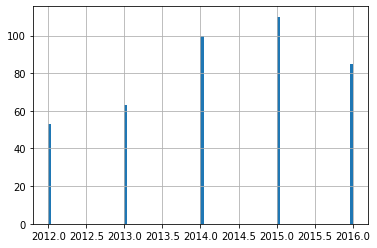

In [60]:
#построим гистограмму для платформы PSV
data_actual.loc[data_actual['platform'] == 'PSV', 'year_of_release'].hist(bins=100)

Пик продаж PSV был в 2015 году. Продажи начали падать. Следует посмотреть на данные за 2017 год. Возможны неплохие продажи в ближайшие два года. 

Вывод. Самая перспективная платформа PS4, вторая по перспективности XOne. Стоит рассмотреть и возможности сотрудничества с уникальной платформой долгожителем PC. 


#### Изучим потенциально прибыльные платформы  PS4,  XOne, PC.

Построим  график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [61]:
#импортируем библиотеки для графиков
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#оставим для анализа данные по трем платформам
data_3plt=data_actual.query('platform=="PS4" or  platform=="XOne" or platform=="PC"')

Text(0, 0.5, 'Глобальные продажи')

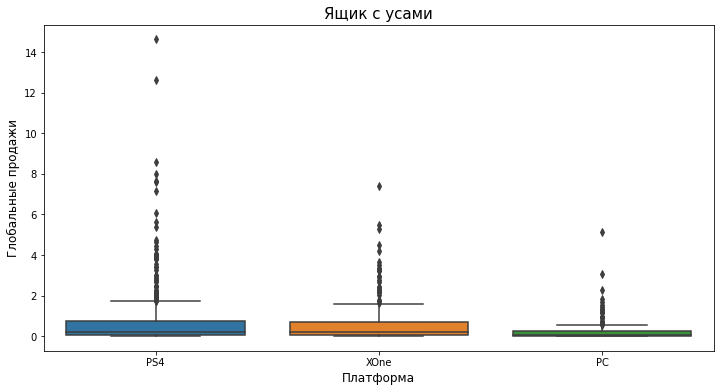

In [63]:

plt.figure(figsize=(12,6))
sns.boxplot(data=data_3plt, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

 Платформа PS4. 

In [64]:
#выведем данные платформы PS4
data_actual.loc[data_actual['platform'] == 'PS4']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,root letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,shin hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,carmageddon: max damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [65]:
#выведем данные платформы PS4 с продажами более 5 млн.$
data_actual[(data_actual['platform'] == 'PS4') & (data_actual['total_sales'] > 5)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,fifa 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,fifa 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,uncharted 4: a thief's end,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


<AxesSubplot:>

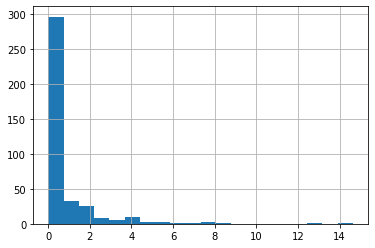

In [66]:
#построим гистограмму распределения всех игр платформы PS4
data_actual.loc[data_actual['platform']== 'PS4', 'total_sales'].hist(bins=20)

<AxesSubplot:>

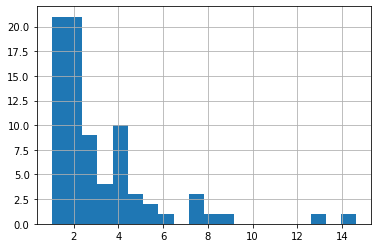

In [67]:
#построим гистограмму распределения всех игр платформы PS4 с продажами более 1 млн. копий 
data_actual.loc[((data_actual['platform']== 'PS4') & (data_actual['total_sales'] > 1)), 'total_sales'].hist(bins=20)

(0.0, 0.8)

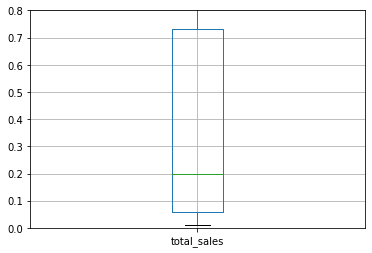

In [68]:
#построим график с усами для платформы PS4 с масштабом по оси y=0.8
import matplotlib.pyplot as plt
data_actual.loc[data_actual['platform'] == 'PS4'].boxplot(column='total_sales')
plt.ylim(0,0.8 )


(0.0, 14.0)

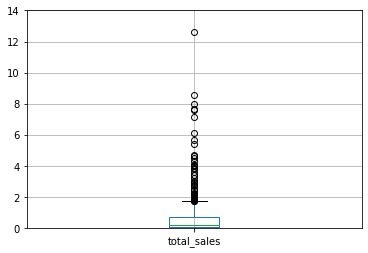

In [69]:
#построим график с усами для платформы PS4 с масштабом по оси y=14
data_actual.loc[data_actual['platform'] == 'PS4'].boxplot(column='total_sales')
plt.ylim(0, 14)

    Большая часть игр платформы PS4 дает невысокие продажи , медиана равна 0.2 млн копий, 25%- игр имеют продажи менее 0.05 млн. копий , и только 25% игр преодолели обьем продаж в 0.73 млн. копий. Отметку в 5 млн. копий преодолели только 10 игр, что составляет 2.5% произведенных игр. 

Платформа XOne.

In [70]:
#выведем данные платформы XOne
data_actual.loc[data_actual['platform'] == 'XOne']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,call of duty: black ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,grand theft auto v,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,call of duty: advanced warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,halo 5: guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,sébastien loeb rally evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,rugby challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,zombiu,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16660,prison architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


In [71]:
#выведем данные платформы XOne с продажами более 3 млн.копий
data_actual[(data_actual['platform'] == 'XOne') & (data_actual['total_sales'] > 3)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,call of duty: black ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,grand theft auto v,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,call of duty: advanced warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,halo 5: guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
342,star wars battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN,3.66
373,assassin's creed: unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
398,destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.37
413,gears of war: ultimate edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
417,fifa 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


(0.0, 0.8)

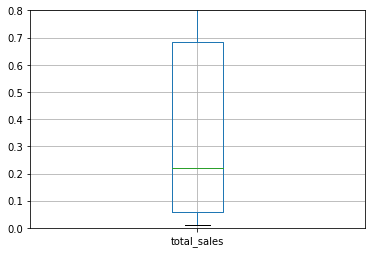

In [72]:
#построим график с усами для платформы XOne с масштабом по оси y=0.8
data_actual.loc[data_actual['platform'] == 'XOne'].boxplot(column='total_sales')
plt.ylim(0, 0.8)

Большая часть игр платформы XOne дает невысокую выручку, медиана равна 0.22 млн. копий , 25%  - игр имеют продажи менее 0.05 млн. копий , и только 25% игр преодолели обьем продаж в 0.68 млн. копий. Отметку в 3 млн. копий преодолели  11 игр, что составляет 4.5% произведенных игр. 

Платформа PC. 

In [73]:
#выведем данные платформы PC
data_actual.loc[data_actual['platform'] == 'PC']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,diablo iii,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
458,the sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
688,guild wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
959,world of warcraft: mists of pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
1095,starcraft ii: heart of the swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16584,transformers: fall of cybertron,PC,2012,Action,0.01,0.00,0.0,0.00,78.0,7.9,T,0.01
16617,codename: panzers complete collection,PC,2016,Strategy,0.00,0.01,0.0,0.00,NaN,NaN,NaN,0.01
16631,the amazing spider-man 2 (2014),PC,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,NaN,0.01
16678,end of nations,PC,2012,Strategy,0.01,0.00,0.0,0.00,NaN,NaN,T,0.01


In [74]:
#выведем данные платформы PC с продажами более 3 млн.копий
data_actual[(data_actual['platform'] == 'PC') & (data_actual['total_sales'] > 3)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,diablo iii,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
458,the sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05


(0.0, 0.5)

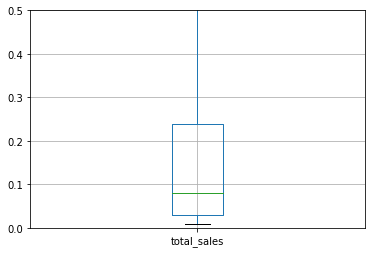

In [75]:
#построим график с усами для платформы PC с масштабом по оси y=0.8
data_actual.loc[data_actual['platform'] == 'PC'].boxplot(column='total_sales')
plt.ylim(0, 0.5)

Большая часть игр платформы PC дает невысокие продажи, медиана равна 0.8 млн копий  ,25% игр не преодолели продажи в 0.2 млн. копий  , и только 25% игр преодолели обьем продаж в 0.25 млн копий . .Отметку в 3млн. копий преодолели 2 игры, что составляет 0.8% произведенных игр.

Вывод. Перспективные платформы для сотрудничества это PS4 и XOne. С сотрудничеством с платформой PC можно не спешить, стоит посмотреть на ее динамику в 2017 году. 

####  Влияние  на продажи игр  отзывов пользователей и критиков. 


Изучим как влияют на продажи внутри одной  платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [76]:
#создадим таблицу из четырех столбцов: total_sales, critic_score,user_score для платформы PS4. 
data_actual_ps4=data_actual.loc[data_actual['platform'] == 'PS4']
data_ps4=data_actual_ps4.loc[:,['total_sales', 'critic_score','user_score']]
data_ps4.head(10)

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
94,7.60,85.0,5.0
105,7.17,87.0,6.5
143,6.08,82.0,5.7
154,5.64,76.0,6.1
171,5.39,93.0,7.9


In [77]:
#построим матрицу корреляции
data_ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

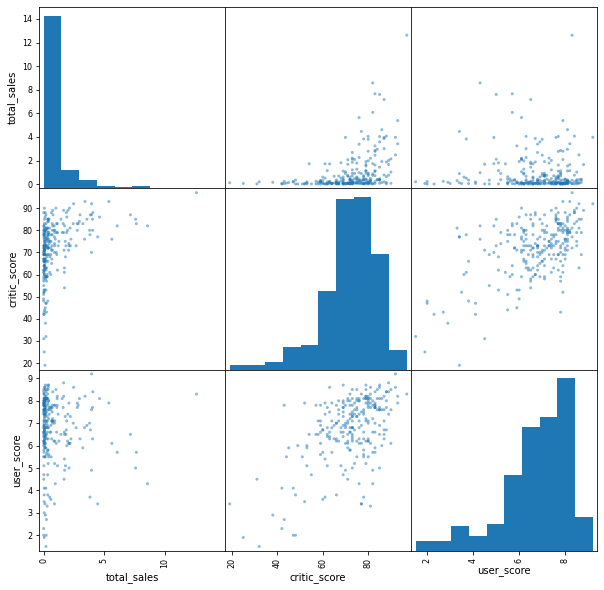

In [78]:
#построим матрицу рассеяния
pd.plotting.scatter_matrix(data_ps4, figsize=(10, 10))

Существует корреляция между продажами и рейтингом критиков, она равна 0,41. Корреляция между обьемом продаж игры и рейтингом пользователей отсутствует. Скорее всего такие связи действуют и для игр на других платформах. 

#### Распределение игр по жанрам.

In [79]:
#создадим таблицу, сгрупированную по жанрам, посчитаем продажи и количество реализуемых игр 
data_actual_gnr=data_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum','count'])
#переименуем столбцы и упорядочиv по продажам
data_actual_gnr.columns = ['total_sales', 'count']
data_actual_gnr.sort_values(by='total_sales',ascending=False )

,total_sales,count
genre,,
Action,441.12,1031
Shooter,304.73,235
Role-Playing,192.80,370
Sports,181.07,268
Misc,85.04,192
Platform,61.00,85
Racing,53.50,115
Fighting,44.49,109
Simulation,35.12,80


Первое место по прибыльности занимает жанр -Action, выручка-441.
На втором месте Shooter	, выручка-305.
На третьем месте Role-Playing, выручка-193. 
Последнее место занимает Puzzle, с выручкой - 4.9 .

##  Портрет пользователя каждого региона.

### Распределение платформ по регионам.

In [80]:
#создадим таблицу, сгрупированную по платформам, посчитаем продажи для трех регионов 
data_actual_rgn=data_actual.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum',)
#распечатаем таблицу упорядоченную по продажам в Европе
data_actual_rgn.sort_values(by='eu_sales',ascending=False ) 

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
PS3,106.86,35.29,103.38
X360,74.52,1.57,140.05
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31
PC,37.76,0.00,19.12
WiiU,25.13,13.01,38.10
Wii,11.92,3.39,17.45
PSV,11.36,21.04,10.98


In [81]:
#распечатаем таблицу упорядоченную по продажам в Сев.Америке
data_actual_rgn.sort_values(by='na_sales',ascending=False )

,eu_sales,jp_sales,na_sales
platform,,,
X360,74.52,1.57,140.05
PS4,141.09,15.96,108.74
PS3,106.86,35.29,103.38
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31
WiiU,25.13,13.01,38.10
PC,37.76,0.00,19.12
Wii,11.92,3.39,17.45
PSV,11.36,21.04,10.98


Топ 5 платформ для Европы в порядке убывания  PS4, PS3, X360, XOne, 3DS.
Топ 5 платформ для Сев.Америки в пор.убыв.   X360, PS4, PS3, XOne, 3DS.
Топ 5 платформ для Японии в пор. убывания  3DS, PS3, PSV, PS4, WiiU, PSP. 
Распределение вкусов пользователей по платформам в Европе и Сев. Америке схожее, тольк платформа X360 занимает в Сев.Америке первое место , а в Еропе -третье. Предпочтения пользоателей Японии кардинально отличается от Европы и Сев.Америки.


### Распределение жанров по регионам.

In [82]:
#создадим таблицу, сгрупированную по жанрам и регионам, посчитаем продажи игр 
data_actual_gnr_rgn=data_actual.pivot_table(index='genre', values=['eu_sales','na_sales','jp_sales'], aggfunc='sum')
# упорядочиv по продажам в Европе
data_actual_gnr_rgn.sort_values(by='eu_sales',ascending=False )

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Shooter,113.47,9.23,144.77
Sports,69.09,8.01,81.53
Role-Playing,48.53,65.44,64.00
Racing,27.29,2.50,17.22
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Simulation,14.55,10.41,7.97
Fighting,10.79,9.44,19.79


In [83]:
#упорядочим по продажам в Сев.Америке
data_actual_gnr_rgn.sort_values(by='na_sales',ascending=False )

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Shooter,113.47,9.23,144.77
Sports,69.09,8.01,81.53
Role-Playing,48.53,65.44,64.00
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Fighting,10.79,9.44,19.79
Racing,27.29,2.50,17.22
Adventure,9.46,8.24,8.92


In [84]:
#упорядочим по продажам в Японии 
data_actual_gnr_rgn.sort_values(by='jp_sales',ascending=False )

,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,48.53,65.44,64.00
Action,159.34,52.80,177.84
Misc,26.32,12.86,38.19
Simulation,14.55,10.41,7.97
Fighting,10.79,9.44,19.79
Shooter,113.47,9.23,144.77
Platform,21.41,8.63,25.38
Adventure,9.46,8.24,8.92
Sports,69.09,8.01,81.53


Предпочтения пользователей Европы и Сев.Америки схожи, первые 4 места занимают следующие жанры в порядке убывания:
Action,	Shooter, Sports, Role-Playing. В европе на 5 месте Racing, в Сев. Америке Misc. 
Предпочтения японцев существенно отличаются их 5 жанров в порядке убывания: 
Role-Playing, Action, Misc, Simulation, Fighting.	

### Влияние  рейтинга ESRB на продажи в отдельном регионе.

In [85]:
#выведем уникальные значения рейтинга 
display(data['rating'].sort_values().unique())
len(data['rating'].unique())

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

9

In [86]:
#создадим таблицу, сгрупированную по рейтингам и регионам, посчитаем продажи игр 
data_actual_rtng = data_actual.pivot_table(index='rating', values=['eu_sales','na_sales','jp_sales'], aggfunc='sum')
# упорядочиv по продажам в Европе
data_actual_rtng.sort_values(by='eu_sales',ascending=False )

,eu_sales,jp_sales,na_sales
rating,,,
M,193.96,21.20,231.57
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
T,52.96,26.02,66.02


В Европе и Сев. Америке предпочтения пользователей по рейтингам схожи , по убыванию они распределены так:
M, E, E10+, T. 
В Японии порядок другой :
M, E, Т, E10+.

## Проверка гипотез.

### Средние пользовательские рейтинги платформ XOne и PC одинаковые.


H_0: Средний пользовательские рейтинги  (user_score) платформы XOne  =  ср. рейтингу пользователей платформы PC.`

H_a: Средний пользовательские рейтинги  (user_score) платформы XOne  ≠  ср. рейтингу пользователей платформы PC.

alpha = 0.05

In [87]:
from scipy import stats as st

In [88]:
user_score_xone  = data_actual[data_actual['platform'] == 'XOne']['user_score']
user_score_pc  = data_actual[data_actual['platform'] == 'PC']['user_score']
#display(user_score_pc)

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(user_score_xone, user_score_pc,equal_var = False,nan_policy='omit')

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.5489537965134987
Не получилось отвергнуть нулевую гипотезу 


### Средние пользовательские рейтинги жанров Action  и Sports  разные.

H_0: Средний пользовательские рейтинги (user_score) жанра Action ≠ ср. рейтингу жанра Sports.

H_a: Средний пользовательские рейтинги (user_score) платформы XOne = ср. рейтингу пользователей платформы PC.

alpha = 0.05

In [90]:
user_score_action  = data_actual[data_actual['genre'] == 'Action']['user_score']
user_score_sports  = data_actual[data_actual['genre'] == 'Sports']['user_score']
#display(user_score_pc)

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False,nan_policy='omit')

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

4.24307776572644e-20
Не получилось отвергнуть нулевую гипотезу 


## Выводы.

    В нашей работе мы проанализировали данные о продажах компьютерных игр по всему миру,для определения перспективных     игровых платформ. 
    Датафрейм содержит строк-16715, столбцов- 11. 
    Данные содержатся с 1981 по 1916 год. 
    
    Описание данных:
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

    В предобработке данных дупликатов не было бнаружено. Строки мы решили не удалять. 

    Мы  поменяли тип данных года выпуска с float на int, и привели данные оценки пользователя к типу float.

    В датафрейм мы добавили столбец суммарных продаж по всем регионам. 

    Исследуя данные мы пришли с следующим выводам:
    Максимальное количество продаваемых игр в мире было в 2008 и 2009 годах чуть более 1400 игр в год, более 650 млн. копий. С 1980 по по 1994 игр продавалось немного, менее 200 в год. С 1992 по 2008 происходил рост количества продаваемых игр , с 2009 по 2015 происходит падение количества продаваемых игр, с 1400 до 500 штук , 250 млн. копий.
    Самые большие продажи у платформы PS2, общие продажи 1256 млн. копий , 2161 игр. 
    Первые 6 платформ являются явными лидерами, их обьем продаж от 730 до 1256 млн. копий.
    Все нижестоящие платформы продают вдвое, втрое и более раз меньше чем лидеры. 
    Можно отметить платформу DS по выручке она на 5 месте 806 млн. копий, а по количеству произведенных игр на втором, не сильно отличаясь от лидера, 2151 игра.
    Вторая группа платформ с 7 по по 18 места с обьемом продаж от 318 млн. копий ( PS4)  до 160 млн. копий (XOne). 
    Изучая продажи платформ по годам, мы пришли к выводу:
    Средний срок жизни платформы около 11 лет +/- 2 года. Самые мощные платформы PS2 и X360 прожили 12 лет, PS3 -11 ; WII, DS, PS-9 лет. 
    Обычно пика производительности платформа достигает в середине срока своей жизни, т.е. через 5-6 лет после начала своей деятельности.
    Актуальный период должен быть меньше 11 лет, поскольку изучать данные "умерших" платформ для задач планирования продаж на 2017 год не имеет смысла. Актуальный период установим в 4 года, чтобы изучать лидеров последних лет, и исключить пяти, шестилетние пики лидеров прошлых лет. И в Будем анализировать данные с 2012 года включительно. 
    Анализируя данные за актуальный период мы выяснили, что : 
    Самая перспективная для продаж и рекламы платформа PS4, вторая по перспективности XOne. . С активной рекламы  платформы PC можно не спешить, стоит посмотреть на ее динамику в 2017 году.
    Существует корреляция между продажами и рейтингом критиков, она равна 0,41. Корреляция между обьемом продаж игры и рейтингом пользователей отсутствует. 

    Изучая продажи игр по регионам , мы выяснили, что:
    Топ 5 платформ для пользователей Европы в порядке убывания PS4, PS3, X360, XOne, 3DS. Топ 5 платформ для пользователей Сев.Америки в пор.убыв. X360, PS4, PS3, XOne, 3DS. Топ 5 платформ для Японии в пор. убывания 3DS, PS3, PSV, PS4, WiiU, PSP. Распределение вкусов пользователей по платформам в Европе и Сев. Америке схожее, только платформа X360 занимает в Сев.Америке первое место , а в Еропе -третье. Предпочтения пользоателей Японии кардинально отличается от Европы и Сев.Америки.
    Предпочтения пользователей Европы и Сев.Америки схожи, первые 4 места занимают следующие жанры в порядке убывания: Action, Shooter, Sports, Role-Playing. В европе на 5 месте Racing, в Сев. Америке Misc. Предпочтения японцев существенно отличаются их 5 жанров в порядке убывания: Role-Playing, Action, Misc, Simulation, Fighting.
    В Европе и Сев. Америке предпочтения пользователей по рейтингам ESRB схожи , по убыванию они распределены так: M, E, E10+, T. В Японии порядок другой : M, E, Т, E10+.

    Мы проверили две гипотезы:
    1.Средние пользовательские рейтинги платформ XOne и PC одинаковые. Гипотеза оказалась верной.
    2.Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза оказалась верной.